# Hands on neural network

## Neural network with Tensorflow : Face recognition

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load data
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=200, resize=0.25)

# 766 images of 31 * 23 pixel black & white
print(faces.images.shape)

(766, 31, 23)


In [2]:
# 2 different target classes
np.unique(faces.target)

array([0, 1])

Let's visualize some faces:

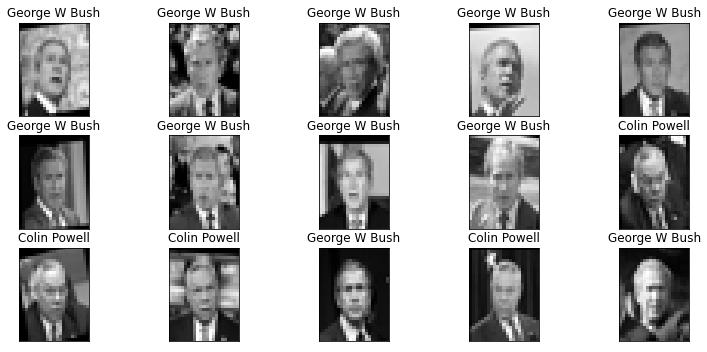

In [3]:
fig = plt.figure(figsize=(13,10))
for i in range(15):
    plt.subplot(5, 5, i + 1)
    plt.title(faces.target_names[faces.target[i]], size=12)
    plt.imshow(faces.images[i], cmap=plt.cm.gray)
    plt.xticks(()); plt.yticks(())

### Minimal preprocessing

In [4]:
# Flatten our 766 images
X = faces.images.reshape(766, 31*23)
X.shape

(766, 713)

In [5]:
y = faces.target
y.shape

(766,)

In [6]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

In [7]:
# Standardize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

### Simple model with two hidden layers

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

# Model definition
model = Sequential()
model.add(layers.Dense(20, activation='relu', input_dim=713))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

2022-08-07 06:31:23.256696: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/hostedtoolcache/Python/3.8.13/x64/lib
2022-08-07 06:31:23.256732: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Model: "sequential"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 dense (Dense)               (None, 20)                14280     


 dense_1 (Dense)             (None, 10)                210       


 dense_2 (Dense)             (None, 1)                 11        


Total params: 14,501


Trainable params: 14,501


Non-trainable params: 0


_________________________________________________________________


2022-08-07 06:31:26.327305: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/hostedtoolcache/Python/3.8.13/x64/lib
2022-08-07 06:31:26.327338: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-08-07 06:31:26.327363: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (fv-az75-154): /proc/driver/nvidia/version does not exist
2022-08-07 06:31:26.328259: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy', 
    metrics = ['accuracy'])

model.fit(X_train, y_train, batch_size=16, epochs=20)

Epoch 1/20


 1/36 [..............................] - ETA: 18s - loss: 0.8083 - accuracy: 0.4375

36/36 [==============================] - 1s 1ms/step - loss: 0.6364 - accuracy: 0.6725


Epoch 2/20


 1/36 [..............................] - ETA: 0s - loss: 0.2433 - accuracy: 0.9375

36/36 [==============================] - 0s 1ms/step - loss: 0.3336 - accuracy: 0.8815


Epoch 3/20


 1/36 [..............................] - ETA: 0s - loss: 0.1884 - accuracy: 0.9375

36/36 [==============================] - 0s 1ms/step - loss: 0.2042 - accuracy: 0.9425


Epoch 4/20


 1/36 [..............................] - ETA: 0s - loss: 0.0832 - accuracy: 1.0000

36/36 [==============================] - 0s 1ms/step - loss: 0.1329 - accuracy: 0.9634


Epoch 5/20


 1/36 [..............................] - ETA: 0s - loss: 0.0818 - accuracy: 1.0000

36/36 [==============================] - 0s 1ms/step - loss: 0.0773 - accuracy: 0.9913


Epoch 6/20


 1/36 [..............................] - ETA: 0s - loss: 0.0234 - accuracy: 1.0000

36/36 [==============================] - 0s 1ms/step - loss: 0.0486 - accuracy: 0.9983


Epoch 7/20


 1/36 [..............................] - ETA: 0s - loss: 0.0220 - accuracy: 1.0000

36/36 [==============================] - 0s 1ms/step - loss: 0.0328 - accuracy: 0.9983


Epoch 8/20


 1/36 [..............................] - ETA: 0s - loss: 0.0300 - accuracy: 1.0000

36/36 [==============================] - 0s 1ms/step - loss: 0.0228 - accuracy: 0.9983


Epoch 9/20


 1/36 [..............................] - ETA: 0s - loss: 0.0150 - accuracy: 1.0000

36/36 [==============================] - 0s 1ms/step - loss: 0.0175 - accuracy: 0.9983


Epoch 10/20


 1/36 [..............................] - ETA: 0s - loss: 0.0063 - accuracy: 1.0000

36/36 [==============================] - 0s 1ms/step - loss: 0.0135 - accuracy: 0.9983


Epoch 11/20


 1/36 [..............................] - ETA: 0s - loss: 0.0119 - accuracy: 1.0000

36/36 [==============================] - 0s 1ms/step - loss: 0.0109 - accuracy: 0.9983


Epoch 12/20


 1/36 [..............................] - ETA: 0s - loss: 0.0071 - accuracy: 1.0000

36/36 [==============================] - 0s 1ms/step - loss: 0.0090 - accuracy: 0.9983


Epoch 13/20


 1/36 [..............................] - ETA: 0s - loss: 0.0041 - accuracy: 1.0000

36/36 [==============================] - 0s 1ms/step - loss: 0.0070 - accuracy: 1.0000


Epoch 14/20


 1/36 [..............................] - ETA: 0s - loss: 0.0101 - accuracy: 1.0000

36/36 [==============================] - 0s 1ms/step - loss: 0.0056 - accuracy: 1.0000


Epoch 15/20


 1/36 [..............................] - ETA: 0s - loss: 0.0086 - accuracy: 1.0000

36/36 [==============================] - 0s 1ms/step - loss: 0.0045 - accuracy: 1.0000


Epoch 16/20


 1/36 [..............................] - ETA: 0s - loss: 0.0026 - accuracy: 1.0000

36/36 [==============================] - 0s 1ms/step - loss: 0.0038 - accuracy: 1.0000


Epoch 17/20


 1/36 [..............................] - ETA: 0s - loss: 0.0030 - accuracy: 1.0000

36/36 [==============================] - 0s 1ms/step - loss: 0.0032 - accuracy: 1.0000


Epoch 18/20


 1/36 [..............................] - ETA: 0s - loss: 0.0047 - accuracy: 1.0000

36/36 [==============================] - 0s 1ms/step - loss: 0.0028 - accuracy: 1.0000


Epoch 19/20


 1/36 [..............................] - ETA: 0s - loss: 0.0024 - accuracy: 1.0000

36/36 [==============================] - 0s 1ms/step - loss: 0.0025 - accuracy: 1.0000


Epoch 20/20


 1/36 [..............................] - ETA: 0s - loss: 0.0012 - accuracy: 1.0000

36/36 [==============================] - 0s 1ms/step - loss: 0.0022 - accuracy: 1.0000


### Evaluate performance

In [10]:
model.evaluate(scaler.transform(X_test), y_test)
# returns [loss, metrics]

1/6 [====>.........................] - ETA: 0s - loss: 0.1791 - accuracy: 0.9375

6/6 [==============================] - 0s 2ms/step - loss: 0.1960 - accuracy: 0.9375


[0.19597961008548737, 0.9375]

Is it good? What's our baseline?

In [11]:
pd.Series(y).value_counts()


1    530
0    236
dtype: int64

In [12]:
# Baseline score
530 / (530+236)

0.6919060052219321

### Let's check our predictions!

In [13]:
# Predicted probabilities
model.predict(scaler.transform(X_test))

1/6 [====>.........................] - ETA: 0s

6/6 [==============================] - 0s 1ms/step


array([[9.99660254e-01],
       [4.68072994e-06],
       [9.99990642e-01],
       [7.33523222e-04],
       [1.10861969e-04],
       [9.99916196e-01],
       [8.87035429e-01],
       [9.99702096e-01],
       [1.23133495e-05],
       [9.99951959e-01],
       [9.98332739e-01],
       [9.99999881e-01],
       [7.25714117e-02],
       [9.97423291e-01],
       [9.23542976e-01],
       [9.99949813e-01],
       [9.95597959e-01],
       [9.85426486e-01],
       [9.91671264e-01],
       [9.99782085e-01],
       [9.99786079e-01],
       [9.99977052e-01],
       [9.99877036e-01],
       [9.98548627e-01],
       [9.99979198e-01],
       [9.99747574e-01],
       [9.98715937e-01],
       [2.48989820e-01],
       [3.90036404e-01],
       [9.37705398e-01],
       [8.96486381e-05],
       [9.78669286e-01],
       [9.99856710e-01],
       [7.16142869e-03],
       [8.83050978e-01],
       [3.47061336e-01],
       [9.99958813e-01],
       [9.99826312e-01],
       [9.99845445e-01],
       [5.82376063e-01],


## Linear regression with Tensorflow

## Logistic regression with Tensorflow